In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utilities import pasar_a_datetime
import os 

## Wikipedia Surveys

In [3]:
# Change this path to run in your machine
home_path = 'C:/Users/54911/OneDrive/Documentos/git_repos/elecciones2023-arg'

In [4]:
os.chdir(home_path)

In [10]:
primera_vuelta = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/Survey_primera_vuelta.csv')
ballojate = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/Survey_ballotage.csv')

'Inicio' : survey's start date

'Final' : survey's end date

In [11]:
ballojate['Inicio'] = ballojate['Inicio'].map(lambda x:pasar_a_datetime(x))
ballojate['Final'] = ballojate['Final'].map(lambda x:pasar_a_datetime(x))
primera_vuelta['Inicio'] = primera_vuelta['Inicio'].map(lambda x:pasar_a_datetime(x))
primera_vuelta['Final'] = primera_vuelta['Final'].map(lambda x:pasar_a_datetime(x))

In [12]:
parties_ballotage = ballojate.columns[4:6]
parties_primera_vuelta = primera_vuelta.columns[4:9]

## Ploting time series

Text(0, 0.5, 'Percentage')

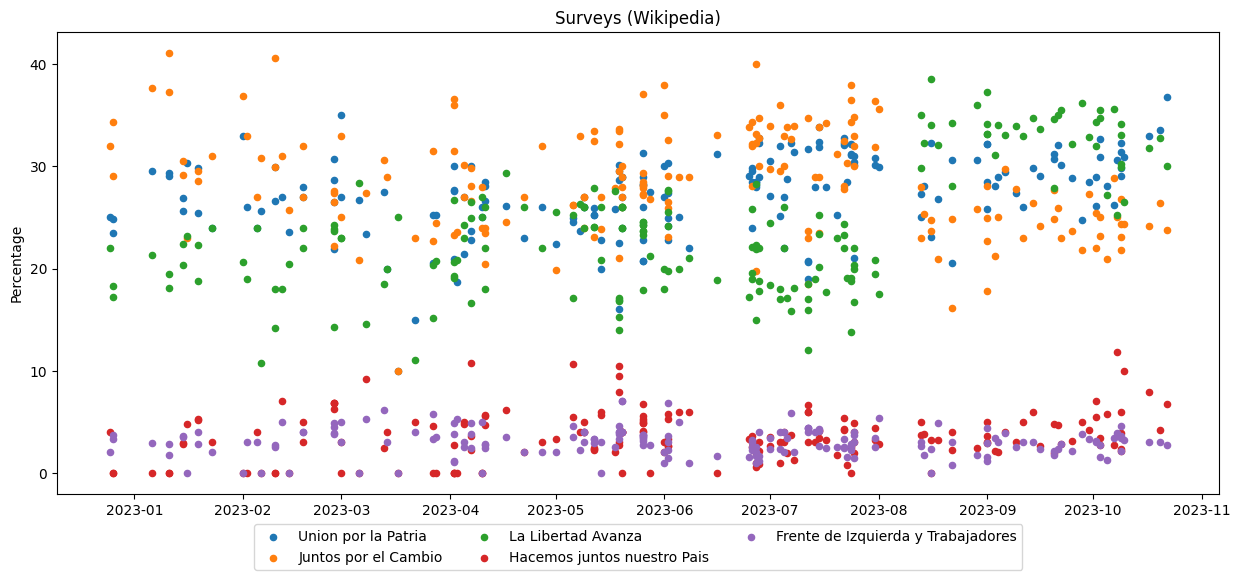

In [7]:
plt.figure(figsize=(15,6))
for p in parties_primera_vuelta:
    plt.scatter(primera_vuelta['Inicio'],primera_vuelta[p],label = p,s=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=3)
plt.title('Surveys (Wikipedia)')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentaje')

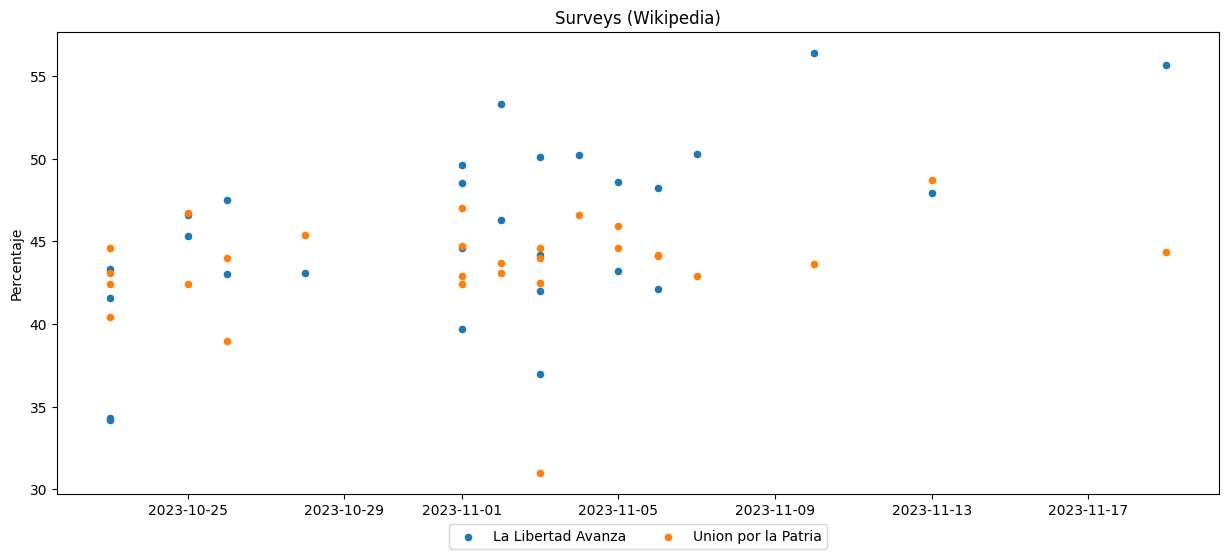

In [8]:
plt.figure(figsize=(15,6))
for p in parties_ballotage:
    plt.scatter(ballojate['Inicio'],ballojate[p],label = p,s=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=3)
plt.title('Surveys (Wikipedia)')
plt.ylabel('Percentaje')

## Inspecting data

'Muestra' : amount of people that have been interviewed

In [88]:
upper_bound = primera_vuelta['Muestra']<primera_vuelta['Muestra'].quantile(0.95)
lower_bound = primera_vuelta['Muestra']>primera_vuelta['Muestra'].quantile(0.05)
filtered_outliers = primera_vuelta[lower_bound & upper_bound]
lost_percent = round(100*(len(primera_vuelta)-len(filtered_outliers))/len(primera_vuelta),2)
print('It was lost ',lost_percent,' % of the original data')

It was lost  13.59  % of the original data


Text(0.5, 1.0, 'Primera vuelta')

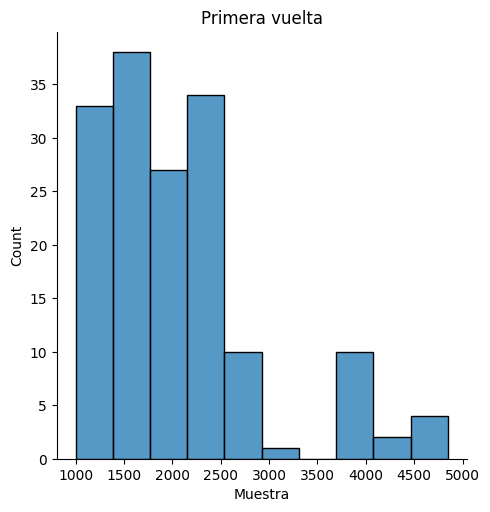

In [87]:
sns.displot(data=filtered_outliers,x='Muestra')
plt.title('Primera vuelta')

In [47]:
upper_bound = ballojate['Muestra']<ballojate['Muestra'].quantile(0.95)
lower_bound = ballojate['Muestra']>ballojate['Muestra'].quantile(0.05)
filtered_outliers = ballojate[lower_bound & upper_bound]
lost_percent = round(100*(len(ballojate)-len(filtered_outliers))/len(ballojate),2)
print('It was lost ',lost_percent,' % of the original data')

It was lost  14.29  % of the original data


Text(0.5, 1.0, 'Ballotage')

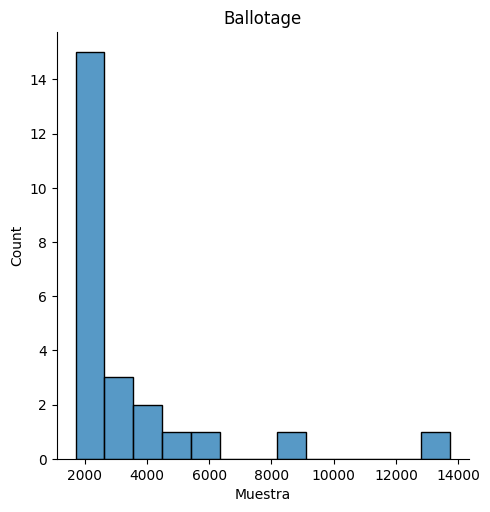

In [50]:
sns.displot(data=filtered_outliers,x='Muestra')
plt.title('Ballotage')

Values expresses in percentage

'Blanco': Blank vote

'Indecisos': indecisive

In [72]:
careless = primera_vuelta['Blanco'] + primera_vuelta['Indecisos']

In [79]:
upper_bound = careless<careless.quantile(0.90)
filtered_outliers = careless[upper_bound]
lost_percent = round(100*(len(careless)-len(filtered_outliers))/len(careless),2)
print('It was lost ',lost_percent,' % of the original data')

It was lost  10.33  % of the original data


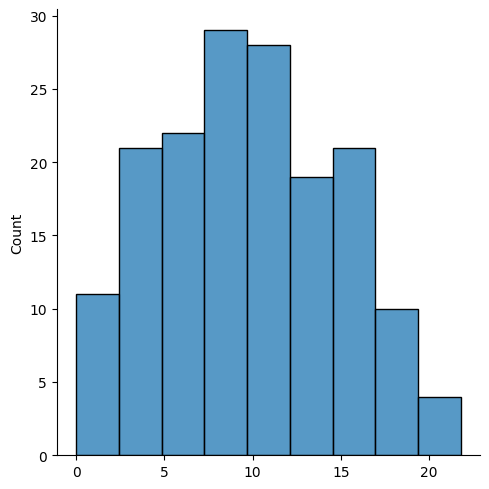

In [80]:
sns.displot(filtered_outliers)

In [81]:
careless = ballojate['Blanco'] + ballojate['Indecisos']

In [82]:
upper_bound = careless<careless.quantile(0.90)
filtered_outliers = careless[upper_bound]
lost_percent = round(100*(len(careless)-len(filtered_outliers))/len(careless),2)
print('It was lost ',lost_percent,' % of the original data')

It was lost  10.71  % of the original data


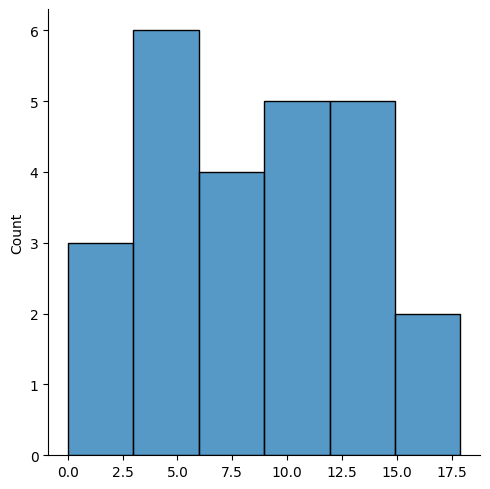

In [83]:
sns.displot(filtered_outliers)

## Polynomial Adjust

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Lest's work with clean data

In [5]:
primera_vuelta_clean = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/primera_vuelta_cleaned.csv')
ballojate_clean = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/ballotage_cleaned.csv')

In [20]:
parties_primera_vuelta = primera_vuelta_clean.columns[0:5]
parties_ballotage = ballojate_clean.columns[0:2]

In [6]:
primera_vuelta_clean['Inicio'] = primera_vuelta_clean['Inicio'].map(lambda x:pasar_a_datetime(x))
primera_vuelta_clean['Final'] = primera_vuelta_clean['Final'].map(lambda x:pasar_a_datetime(x))
ballojate_clean['Inicio'] = ballojate_clean['Inicio'].map(lambda x:pasar_a_datetime(x))
ballojate_clean['Final'] = ballojate_clean['Final'].map(lambda x:pasar_a_datetime(x))

In [21]:
grado =4
encuestas_polinomio_partidos = []

Text(0, 0.5, 'Porcentaje')

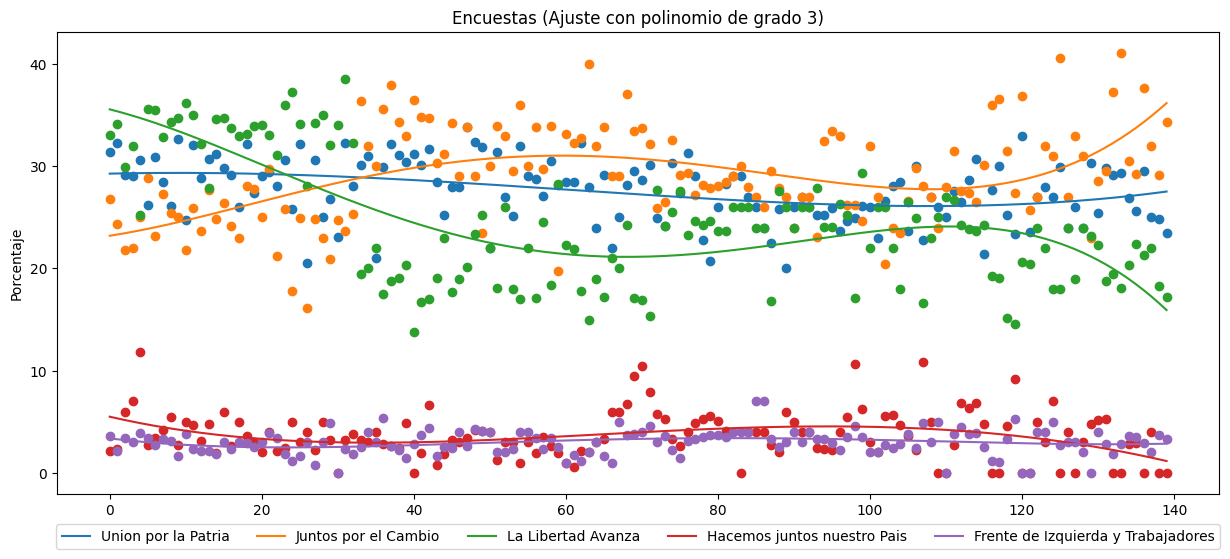

In [22]:
ejex = np.arange(len(primera_vuelta_clean))
plt.figure(figsize=(15,6))
for p in parties_primera_vuelta:
    
    poly_reg_model = LinearRegression()
    poly = PolynomialFeatures(degree=grado, include_bias=False)
    poly_features = poly.fit_transform(ejex.reshape(-1, 1))

    y = primera_vuelta_clean[p].to_numpy()
    poly_reg_model.fit(poly_features, y)
    #X_=np.linspace(ejex.min(), ejex.max(), 200).reshape(-1, 1)
    Y_=poly_reg_model.predict(poly_features)

    encuestas_polinomio_partidos.append(Y_)

    plt.plot(ejex, Y_,label=p)
    plt.scatter(ejex,primera_vuelta_clean[p])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=5)
plt.title('Encuestas (Ajuste con polinomio de grado 3)')
plt.ylabel('Porcentaje')